# AP156 Week 2 (15 Aug 18)

Domingo, Kenneth V.<br />
2015-03116

Primary references:
1. Kinzel, W., and Reents, G. (1998). Nonlinear fit. In M. Clajus, and B. Freeland-Clajus (Trans.), <i>Physics by computer: Programming physical problems using Mathematica and C</i> (pp. 23-30). New York: Springer (Original work published 1996).
2. Carey, User (2017, May 28). Loopless chi-square grid search in Python numpy [Online discussion group]. In <i>Stack Overflow</i>. Retrieved 19 August 2018, from https://stackoverflow.com/questions/44224765/loopless-chi-square-grid-search-in-python-numpy.
3. Standard deviation. (n.d.). In <i>Wikipedia</i>. Retrieved 19 August 2018, from https://en.wikipedia.org/wiki/Standard_deviation.

In [6]:
import numpy as np
import matplotlib.pyplot as mp
import numpy.random as rd
import scipy.optimize as spo
import scipy.stats as sps
import scipy.special as spec
from jupyterthemes import jtplot

In [29]:
jtplot.reset()
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (5*16/9,5)
mp.rcParams["figure.dpi"] = 72

## 1.5 Nonlinear Fit

Assume $N$ data pairs $\{ Y_i, T_i \}$, to which a model function $g(\vec{a},t_i)$ with an unknown $M$-component parameter vector $\vec{a}$ is to be fitted. Assume further that it is known that for each $t_i$ the data $Y_i$ are measured with errors $\epsilon_i$ that vanish when averaged over many experiments and have the variances $\sigma_i^2$, i.e. $\langle \epsilon_i \rangle = 0$ and $\langle \epsilon_i^2 \rangle = \sigma_i^2$. The "best" set of parameters $\vec{a}$ is defined to be the vector $\vec{a_0}$ whose components minimize the quadratic deviation $\chi^2$, where $\chi^2$ is defined as:

\begin{equation}
    \chi^2(\vec{a}) = \sum_{i=1}^N \Bigg[ \frac{Y_i - g(\vec{a},t_i)}{\sigma_i} \Bigg]^2
\tag{1.28}
\end{equation}

The distribution of $\chi^2(\vec{a_0})$ is known if $g(\vec{a_0},t_i)$ is a suitable model and the errors $\epsilon_i = Y_i - g(\vec{a_0},t_i)$ are uncorrelated and follow a Gaussian distribution. One can verify by repeating the experiment many times that the probability for $\chi_0^2$ is given by:

\begin{equation}
    P_{N-M}(\chi_0^2) = \frac{1}{\Gamma(\frac{N-M}{2})} \int_0^{\frac{\chi_0^2}{2}} e^{-t} t^{\frac{N-M}{2}-1} dt
\tag{1.29}
\end{equation}

The integral is known in mathematical literature as an incomplete gamma function $\gamma\Big(\frac{N-M}{2}, \frac{\chi_0^2}{2}\Big)$.

$\chi^2(\vec{a}_0)$ only has $N-M$ independent variables, since $M$ degrees of freedom are fixed by the minimum condition. For large values of $N-M$, the central limit theorem applies: $\chi^2$ is distributed according to a Gaussian with mean $\langle \chi^2 \rangle = N-M$ and variance $2(N-M)$.

Now what is the meaning of the $\chi^2$ distribution for the precision of our fit? Let us assume that our experiment yields that value $\chi_0^2 = \chi^2(\vec{a}_0)$ for the minimum of (1.28), with a value $P(\chi_0^2) = 0.99$. This means that if the model is correct, the value of $\chi^2$ would be less than $\chi_0^2$ in 99% of all experiments. We could still accept that as a valid fit, since we cannot exclude the possibility that our experiment belongs to those 1% of all cases for which $\chi^2 \geq \chi_0^2$. If, however, we had $P = 0.9999$, our fit would only be correct if it belonged to the 0.01% of the experiments for which $\chi^2 \geq \chi_0^2$. In this case, we would certainly conclude that our assumptions, and our model in particular, are not correct. On the other hand, the value of $\chi_0^2$ must not be too small, since our data points do have statistical errors. The probability for an experiment to yield a smaller value than our $\chi_0^2$ is again given by the distribution (1.29). The interval for that value of $P(\chi_0^2)$ that we want to accept is called the <i>confidence interval</i>.

Let us assume now that we are satisfied with the quality of our fit, i.e., $\chi^2(\vec{a})$ has a minimum for some parameters $\vec{a}_0$ and the value of $\chi^2(\vec{a}_0)$ falls within our confidence interval. If we could repeat the experiment several times, we would of course obtain different errors $\epsilon_i$ and consequently, a different parameter vector $\vec{a}_0$. We perform just one experiment, however, but want to use the data to estimate the error of $\vec{a}_0$ anyway.

Here, the $\chi^2$ distribution (1.29) helps us again, as contours in $M$-dimensional $\vec{a}$-space with constant values of $\chi^2(\vec{a})$ are a measure of the error of $\vec{a}_0$. For small deviations $|\vec{a} - \vec{a}_0|$, these contours are ellipsoids with $M$ principal axes. Their lengths are a measure of the change one can allow for $\vec{a}_0$ along these axes before the fit is no longer acceptable.

In [19]:
rd.seed(24601)

def f(t, a, w, phi, b):
    return a*np.sin(w*t + phi) * np.exp(-b*t)

t = np.arange(0,3*np.pi+0.1,0.3*np.pi)
ts = np.linspace(0,3*np.pi,121)
y = f(t,1,1,0,0.1)
ynoise =0.4*rd.random() - 0.2
ydata = y+ynoise

In [20]:
popt,pcov = spo.curve_fit(f,t,ydata)
popt

array([1.09020097, 0.98274341, 0.05983046, 0.10651353])

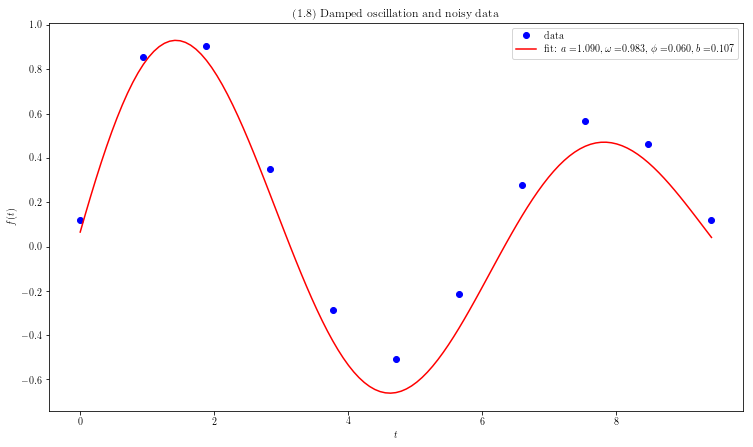

In [30]:
mp.figure(figsize=(7*16/9,7))
mp.plot(t,ydata,"bo", label="data")
mp.plot(ts,f(ts,*popt), "r-", label="fit: $a=$%5.3f, $\omega=$%5.3f, $\phi=$%5.3f, $b=$%5.3f"%tuple(popt))
mp.legend()
mp.xlabel("$t$")
mp.ylabel("$f(t)$")
mp.title(r"$\textrm{(1.8) Damped oscillation and noisy data}$")
mp.show()

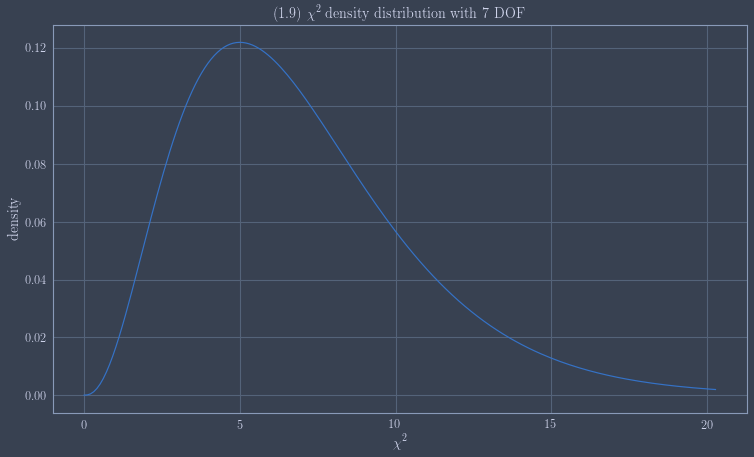

In [17]:
chi = np.linspace(sps.chi2.ppf(0,df=7), sps.chi2.ppf(0.995,df=7),200)
density = sps.chi2.pdf(chi,df=7)

fig,ax = mp.subplots(figsize=(7*16/9,7))
ax.xaxis.set_major_locator(mp.MultipleLocator(5))
mp.plot(chi,density)
mp.xlabel("$\chi^2$")
mp.ylabel(r"$\textrm{density}$")
mp.title(r"$\textrm{(1.9) } \chi^2 \textrm{ density distribution with 7 DOF}$")
mp.show()

In [6]:
def limit(x):
    return sps.chi2.ppf(x,df=7)

tuple((limit(0.05),limit(0.95)))

(2.167349909298058, 14.067140449340167)

In [101]:
chisq0 = sum((ydata-f(t,*popt))**2)/(2/150)
chisq0

9.971055378680077

In [87]:
a = np.linspace(np.sqrt(2)-1,np.sqrt(2),100)
b = np.linspace(-0.05,0.2,100)
A,B = np.meshgrid(a,b)
Chi2ab = np.zeros((len(a),len(b)))

for k in range(len(b)):
    for j in range(len(a)):
        for i in range(len(ydata)):
            err = ydata[i] - f(t[i],a[j],popt[1],popt[2],b[k])
            sigma = np.sqrt((ydata[i]-np.mean(ydata))**2)
            chi2ab = (err)**2/(2/150)
            Chi2ab[k,j] += chi2ab

delta = abs(Chi2ab - chisq0)
#Zab = sps.chi2.cdf(delta,df=4)
Zab = spec.gammainc(4/2,delta/2)

In [88]:
w = np.linspace(0.9,1.06,100)
bw = np.linspace(0,0.16,100)
W,Bw = np.meshgrid(w,bw)
Chi2wb = np.zeros((len(w),len(bw)))

for k in range(len(b)):
    for j in range(len(w)):
        for i in range(len(ydata)):
            err = ydata[i] - f(t[i],popt[0],w[j],popt[2],bw[k])
            sigma = np.sqrt((ydata[i]-np.mean(ydata))**2)
            chi2wb = (err)**2/(2/150)
            Chi2wb[k,j] += chi2wb
            
delta = abs(Chi2wb - chisq0)
#Zwb = sps.chi2.cdf(delta,df=4)
Zwb = spec.gammainc(4/2,delta/2)

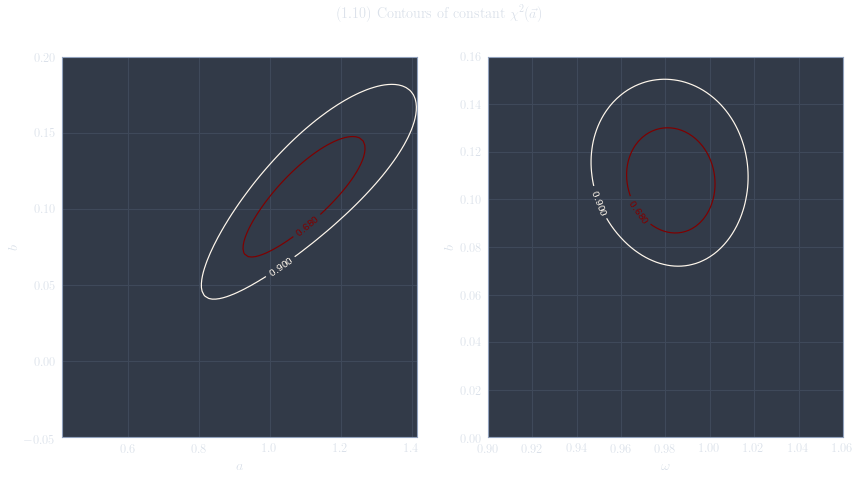

In [89]:
fig,(ax1,ax2) = mp.subplots(ncols=2,figsize=(7*2,7))
mp.suptitle(r"$\textrm{(1.10) Contours of constant } \chi^2(\vec{a})$",fontsize="x-large")

cont_ab = ax1.contour(A,B,Zab,cmap="OrRd_r", levels=[0.68,0.90])
ax1.clabel(cont_ab, inline=1)
ax1.set_xlabel("$a$")
ax1.set_ylabel("$b$")
#ax1.set_xlim(0.7,0.8)
#ax1.set_ylim(-0.05,0.2)

cont_wb = ax2.contour(W,Bw,Zwb,cmap="OrRd_r", levels=[0.68,0.90])
ax2.clabel(cont_wb, inline=1)
ax2.set_xlabel("$\omega$")
ax2.set_ylabel("$b$")
#ax2.set_xlim(0.8,1.05)
#ax2.set_ylim(0,0.16)

mp.show()

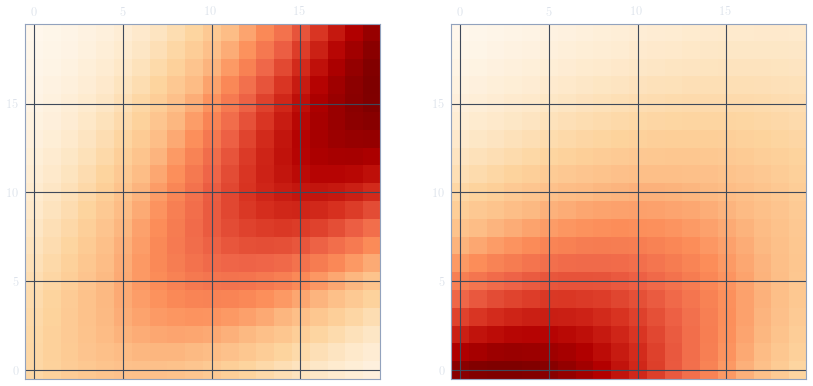

In [93]:
fig,(ax1,ax2) = mp.subplots(ncols=2,figsize=(7*2,7))

ax1.matshow(Zab[40:60,40:60],cmap="OrRd_r",origin="lower")

ax2.matshow(Zab[80:,80:],cmap="OrRd_r",origin="lower")

mp.show()

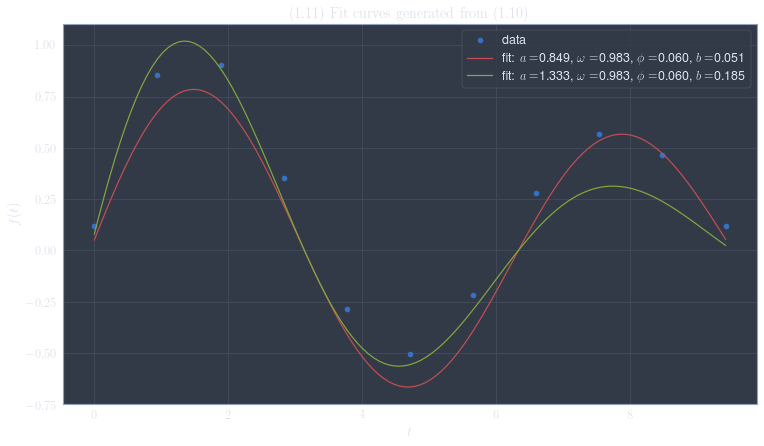

In [94]:
mp.figure(figsize=(7*16/9,7))
mp.plot(t,ydata,"bo", label="data")
mp.plot(ts,f(ts,a[43],popt[1],popt[2],b[40]),"r", label="fit: $a=$%5.3f, $\omega=$%5.3f, $\phi=$%5.3f, $b=$%5.3f"%(a[43],popt[1],popt[2],b[40]))
mp.plot(ts,f(ts,a[91],popt[1],popt[2],b[93]),"g", label="fit: $a=$%5.3f, $\omega=$%5.3f, $\phi=$%5.3f, $b=$%5.3f"%(a[91],popt[1],popt[2],b[93]))
mp.legend()
mp.xlabel("$t$")
mp.ylabel("$f(t)$")
mp.title(r"$\textrm{(1.11) Fit curves generated from (1.10)}$")
mp.show()

In [172]:
poplist = []
for i in range(100):
    y = f(t,*popt)
    ynoise = 0.4*rd.random() - 0.2
    if i%2 > 0:
        ydata = y+ynoise
    else:
        ydata = y-ynoise
    poptnew,pcov = spo.curve_fit(f,t,ydata)
    poplist.append(poptnew)
poplist = np.array(poplist)

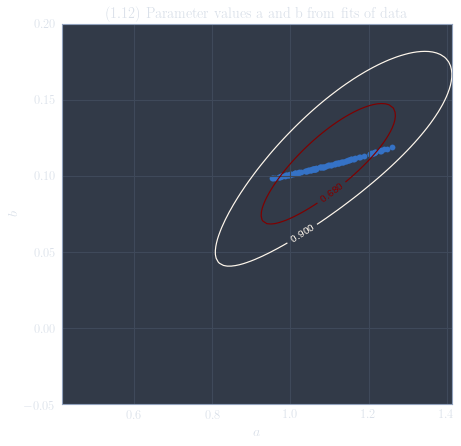

In [173]:
fig,ax1 = mp.subplots(figsize=(7,7))
mp.title(r"$\textrm{(1.12) Parameter values a and b from fits of data}$")

cont_ab = ax1.contour(A,B,Zab,cmap="OrRd_r", levels=[0.68,0.90])
ax1.clabel(cont_ab, inline=1)
#for i in range(np.shape(poplist)[0]):
#    ax1.plot(poplist[i][0],poplist[i][3],"bo")
ax1.scatter(poplist[:,0],poplist[:,3])
ax1.set_xlabel("$a$")
ax1.set_ylabel("$b$")

mp.show()